In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# 슬롯머신(Bandit) 구현
class Bandit:
  def __init__(self, arms=10):  # arms = 슬롯머신 대수
    self.rates = np.random.rand(arms)  # 슬롯머신 각각의 승률 설정(무작위)

  def play(self, arm):
    rate = self.rates[arm]
    if rate > np.random.rand():
      return 1
    else:
      return 0

In [14]:
# 슬롯머신 사용방법 코드
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
0


In [15]:
# 0번째 슬롯머신의 가치 추정
bandit = Bandit()
Q = 0

for n in range(1, 11):  # 10번 반복
  reward = bandit.play(0)  # 0번째 슬롯머신 플레이
  Q += (reward - Q) / n    # 가치 추정치 갱신
  print(Q)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.125
0.1111111111111111
0.09999999999999999


In [16]:
# 10대의 슬롯머신 각각의 가치 추정
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
  action = np.random.randint(0, 10)  # 무작위 행동(임의의 슬롯머신 선택)
  reward = bandit.play(action)

  ns[action] += 1  # action번재 슬롯머신을 플레이한 횟수
  Qs[action] += (reward - Qs[action]) / ns[action]
  print(Qs)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  1.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  1.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  1.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  1.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  1.  1.  0.  0.5 0.  0.  0.  0.  0. ]


In [24]:
# 에이전트 구현(엡실론-탐욕 정책 활용)
class Agent:
  def __init__(self, epsilon, action_size=10):
    self.epsilon = epsilon  # 무작위로 행동할 확률(탐색 활률)
    self.Qs = np.zeros(action_size)
    self.ns = np.zeros(action_size)

  def update(self, action, reward):  # 슬롯머신의 가치 추정
    self.ns[action] += 1
    self.Qs[action] += (reward - Qs[action]) / self.ns[action]

  def get_action(self):  # 행동 선택(엡실론-탐욕 정채)
    if np.random.rand() < self.epsilon:
      return np.random.randint(0, len(self.Qs))  # 무작위 행동 선택
    else:
      return np.argmax(self.Qs)  # 탐욕 행동 선택

In [26]:
# 실제 작동
steps = 1000
epsilon = 0.1

bandit =  Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []  # 보상 합
rates = []          # 승률

for step in range(steps):
  action = agent.get_action()   # 행동 선택
  reward = bandit.play(action)  # 실제로 플레이하고 보상을 받음
  agent.update(action, reward)  # 행동과 보상을 통해 학습
  total_reward += reward

  total_rewards.append(total_reward)       # 현재까지의 보상 합 저장
  rates.append(total_reward / (step + 1))  # 현재까지의 승률 저장

print(total_reward)

890


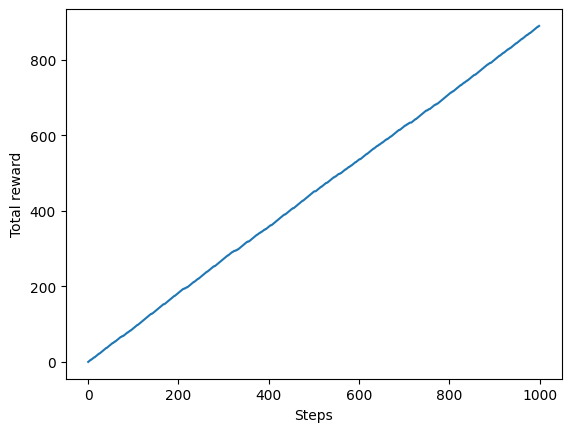

In [29]:
# 그래프 그리기: 단계별 보상 총합
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

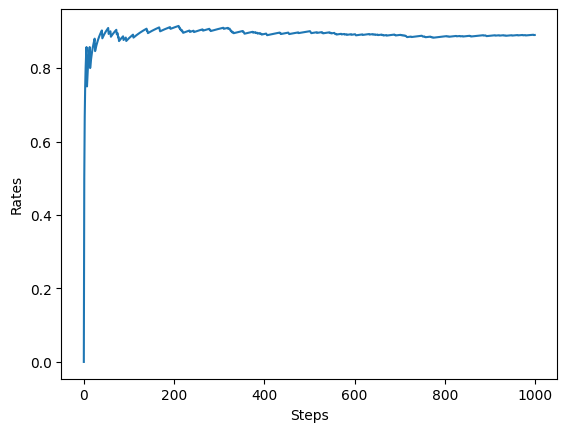

In [30]:
# 그래프 그리기: 단계별 승률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

In [34]:
# 실제 작동
steps = 1000
epsilon = 0.1
every_total_rewards = {}
every_total_rates = {}
for i in range(10):
  bandit =  Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  total_rewards = []  # 보상 합
  rates = []          # 승률

  for step in range(steps):
    action = agent.get_action()   # 행동 선택
    reward = bandit.play(action)  # 실제로 플레이하고 보상을 받음
    agent.update(action, reward)  # 행동과 보상을 통해 학습
    total_reward += reward

    total_rewards.append(total_reward)       # 현재까지의 보상 합 저장
    rates.append(total_reward / (step + 1))  # 현재까지의 승률 저장

  print(f'total_reward: {total_reward}')

  every_total_rewards[i] = total_rewards
  every_total_rates[i] = rates

total_reward: 443
total_reward: 601
total_reward: 339
total_reward: 607
total_reward: 864
total_reward: 788
total_reward: 268
total_reward: 862
total_reward: 453
total_reward: 876


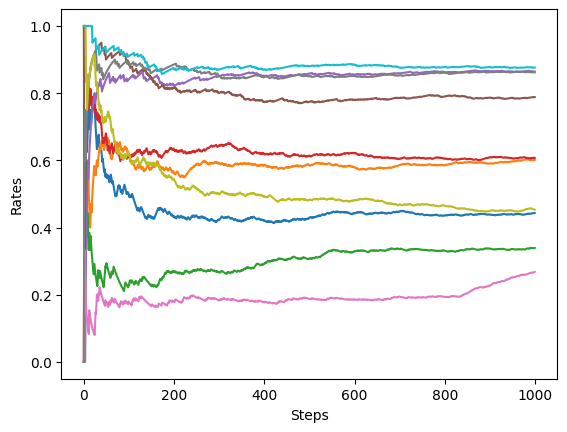

In [35]:
# 10번의 결과를 한꺼번에 그려보기
plt.ylabel('Rates')
plt.xlabel('Steps')
for i in range(10):
  plt.plot(every_total_rates[i])
plt.show()